# Installing XGboost

In [1]:
pip install xgboost

In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [5]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Is Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Is Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data =  data.rename(columns = {'Number of times pregnant':'Pregnancies','Plasma glucose concentration':'Glucose','Diastolic blood pressure (mm Hg)':'BloodPressure',
                                'Triceps skinfold thickness (mm)':'SkinThickness','2-Hour serum insulin (mu U/ml)':'Insulin',
                                'Body mass index (weight in kg/(height in m)^2)':'BMI',
                               'Diabetes pedigree function':'Diabetes pedigree function','Is Diabetic': 'Target'})

In [8]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


# First basic model with basic imputation

In [9]:
data_1 = data.copy()
data_1.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [10]:
data_1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Diabetes pedigree function', 'Age', 'Target'],
      dtype='object')

In [170]:
for col in data_1.columns:
    print(f'{col}:{data_1[data_1[col]==0][col].count()}')

Pregnancies:111
Glucose:5
BloodPressure:35
SkinThickness:227
Insulin:374
BMI:11
Diabetes pedigree function:0
Age:0
Target:500


The following columns have 0 values which need to be replaced with NaN because 0 doesnt seem to appropriate value for this feature

In [12]:
fill_Nan_columns = ['Glucose','BloodPressure','SkinThickness',
                    'Insulin','BMI']
data_1[fill_Nan_columns] = data_1[fill_Nan_columns].replace(0,np.nan)

In [13]:
data_1.isnull().sum()

Pregnancies                     0
Glucose                         5
BloodPressure                  35
SkinThickness                 227
Insulin                       374
BMI                            11
Diabetes pedigree function      0
Age                             0
Target                          0
dtype: int64

checking if any feature is collerated with each other so we can use it to impute missing values

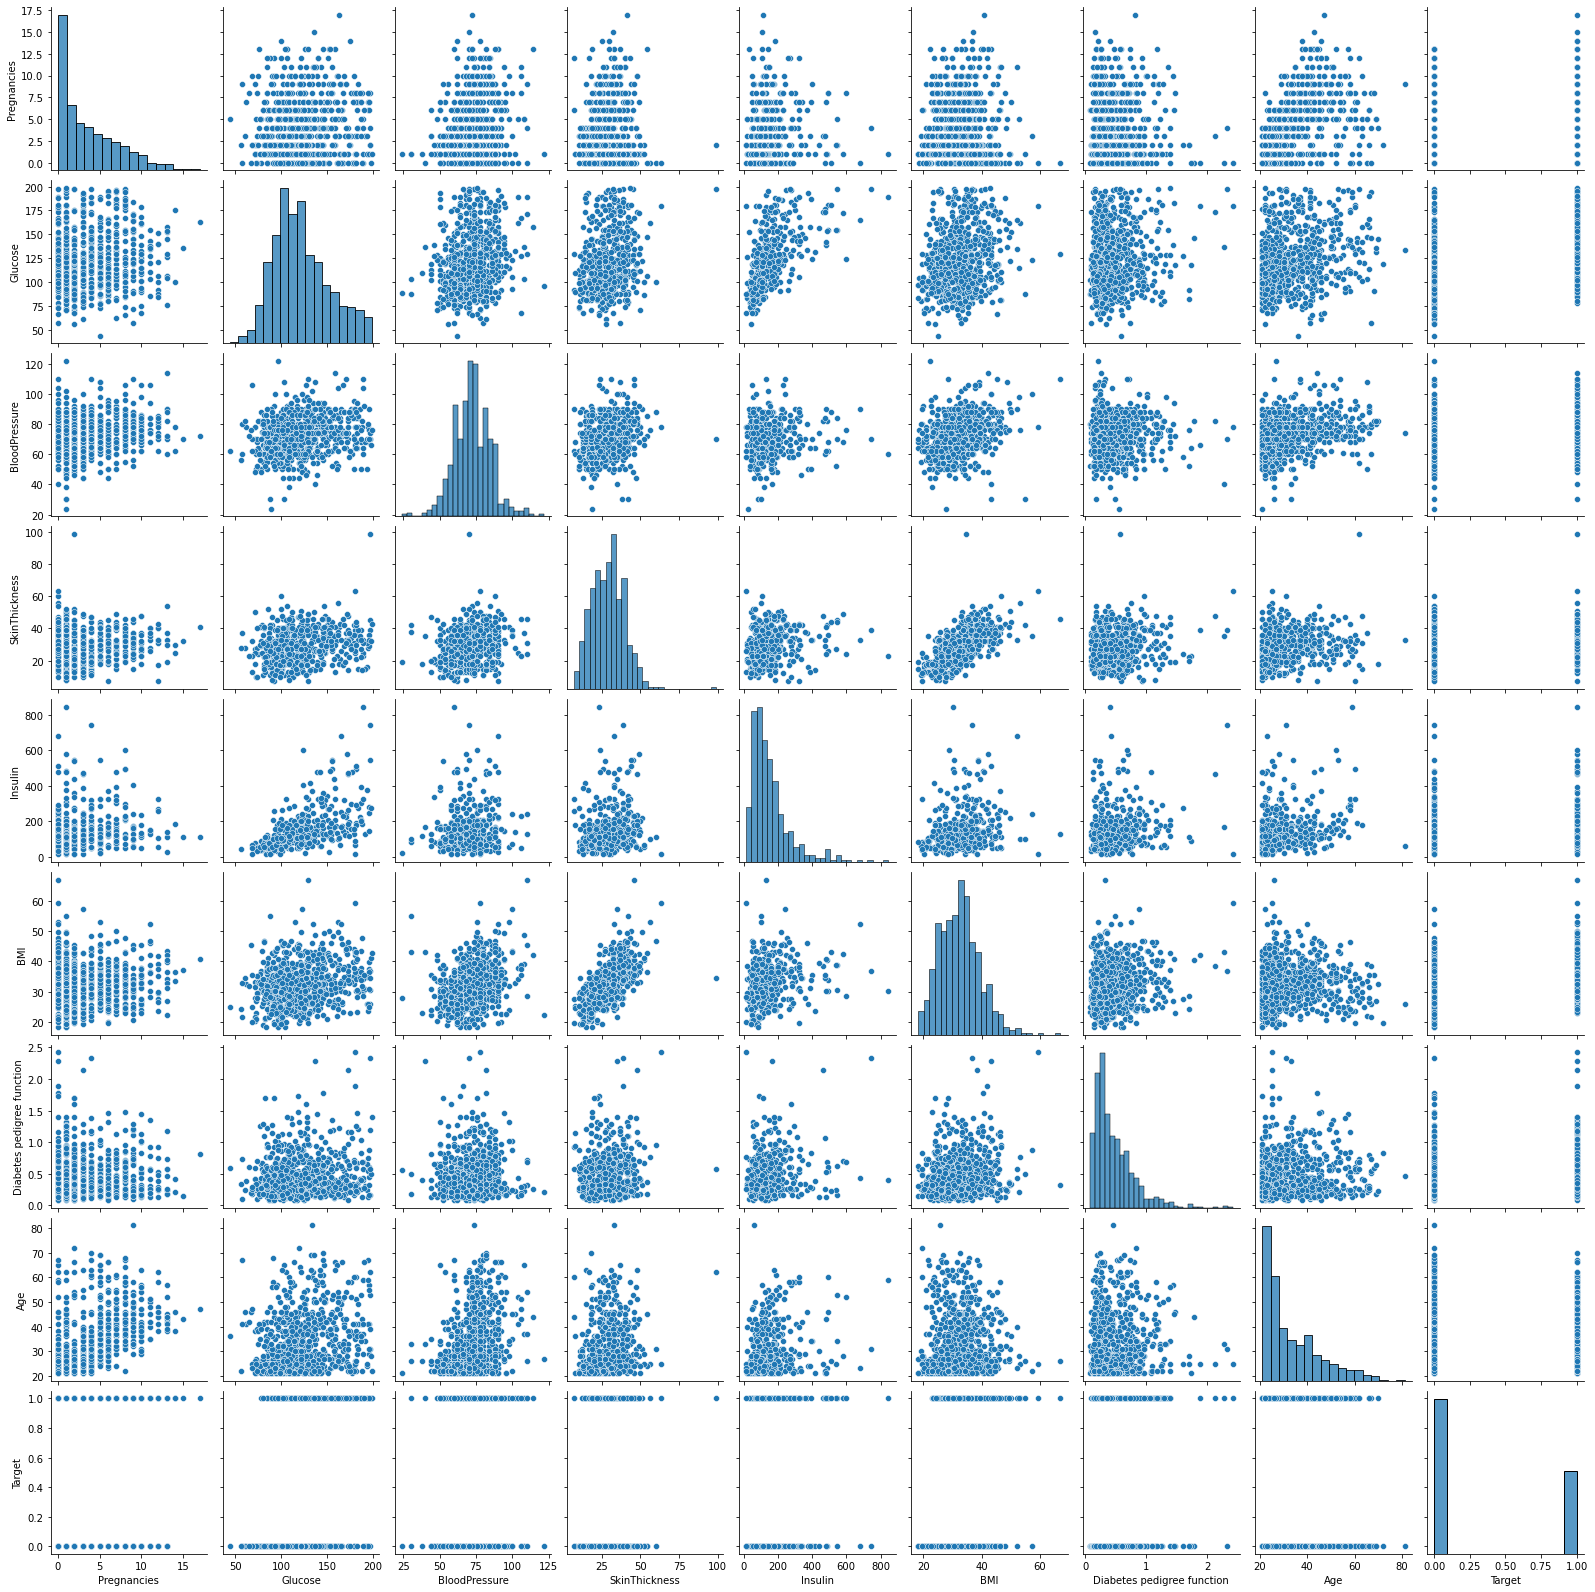

In [14]:
import seaborn as sns
sns.pairplot(data_1)

In [15]:
data_corr  = data_1[['SkinThickness','BMI']]

<AxesSubplot:>

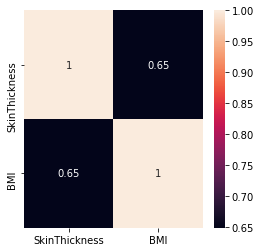

In [16]:
corr = data_corr.corr()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 4,4
sns.heatmap(corr, xticklabels = corr.columns, annot = True, yticklabels = corr.columns)

In [17]:
corr

,SkinThickness,BMI
SkinThickness,1.000000,0.648214
BMI,0.648214,1.000000


These 2 columns are Body mass index (weight in kg/(height in m)^2), riceps skinfold thickness (mm) which have a high coorelation of a;lmost .65. BMI has just 11 nan values so we can fill it by mean and have the skin thickness which has 227 nan filled with a simple linear regression  

from sklearn.linear_model import LinearRegression
data_1['BMI'] = data_1['BMI'].fillna(data_1['BMI'].mean())
SkinThickness_train = pd.DataFrame(data_1[data_1['SkinThickness'] != np.nan].SkinThickness)
SkinThickness_train = pd.DataFrame(data_1.loc[pd.notnull(data_1.SkinThickness)]['SkinThickness'])
BMI_train = pd.DataFrame(data_1.loc[pd.notnull(data_1.SkinThickness)]['BMI'])
BMI_train.isnull().sum()
lm = LinearRegression()
lm.fit(BMI_train,SkinThickness_train)
BMI_test = pd.DataFrame(data_1.loc[pd.isnull(data_1.SkinThickness)]['BMI'])
SkinThickness_test = lm.predict(BMI_test)   
SkinThickness_test_df = pd.DataFrame(data = SkinThickness_test, columns = ['SkinThickness'], index = BMI_test.index.copy())
data_1 = pd.merge(data_1, SkinThickness_test_df, how = 'left', left_index = True, right_index = True) 
data_1["SkinThickness_y"] = data_1["SkinThickness_y"].fillna(data_1["SkinThickness_x"])  
data_1 = data_1.drop('SkinThickness_x', axis=1)        
data_1 = data_1.rename(columns={'SkinThickness_y':'SkinThickness'})
data_1.head(2)                                  

data_1.isnull().sum()

from sklearn.linear_model import LinearRegression
data_1['BMI'] = data_1['BMI'].replace(0,data_1['BMI'].mean())
SkinThickness_train = pd.DataFrame(data_1.loc[pd.notnull(data_1.SkinThickness)]['SkinThickness'])
BMI_train = pd.DataFrame(data_1.loc[pd.notnull(data_1.SkinThickness)]['BMI'])
lm = LinearRegression()
lm.fit(BMI_train,SkinThickness_train)
BMI_test = pd.DataFrame(data_1[data_1['SkinThickness']==0]['BMI'])
SkinThickness_test = lm.predict(BMI_test)   
SkinThickness_test_df = pd.DataFrame(data = SkinThickness_test, columns = ['SkinThickness'], index = BMI_test.index.copy())
data_1 = pd.merge(data_1, SkinThickness_test_df, how = 'left', left_index = True, right_index = True) 
data_1["SkinThickness_y"] = data_1["SkinThickness_y"].fillna(data_1["SkinThickness_x"])  
data_1 = data_1.drop('SkinThickness_x', axis=1)        
data_1 = data_1.rename(columns={'SkinThickness_y':'SkinThickness'})
data_1.isnull().sum()

In [18]:
data_imputed = data_1[fill_Nan_columns]
data_imputed.isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
def impute_data(data_1,fill_Nan_columns):
    #create smller dataframe of columns with nan values
    data_imputed = data_1[fill_Nan_columns]
    #filling BMI with mean bcoz it has just 11 nan values. The aim is to use BMI to predict the nan values of skinthickness
    #we checked before that BMI snd skinthikcness have high corrleation
    data_imputed['BMI'] = data_imputed['BMI'].fillna(data_1['BMI'].mean())
    #extracting only non nan rows of skinthickness to train our model
    #SkinThickness_train = pd.DataFrame(data_imputed[data_imputed['SkinThickness'] != np.nan].SkinThickness)
    SkinThickness_train = pd.DataFrame(data_imputed.loc[pd.notnull(data_imputed.SkinThickness)]['SkinThickness'])
    #extracting only those rows of BMI where skinthickness is not null to train our model
    BMI_train = pd.DataFrame(data_imputed.loc[pd.notnull(data_imputed.SkinThickness)]['BMI'])
    #training our model and fitting
    lm = LinearRegression()
    lm.fit(BMI_train,SkinThickness_train)
    #for predicting passing only BMI values of rows in which skinthickness is null
    BMI_test = pd.DataFrame(data_imputed.loc[pd.isnull(data_imputed.SkinThickness)]['BMI'])
    SkinThickness_test = lm.predict(BMI_test)  
    #copying the original index so we can merge it later
    SkinThickness_test_df = pd.DataFrame(data = SkinThickness_test, columns = ['SkinThickness'], index = BMI_test.index.copy())
    #merging the text result into the data_imputed dataframe
    data_imputed = pd.merge(data_imputed, SkinThickness_test_df, how = 'left', left_index = True, right_index = True) 
    #_y and _x results in this process so now fill na with the predicted result
    data_imputed["SkinThickness_y"] = data_imputed["SkinThickness_y"].fillna(data_imputed["SkinThickness_x"])  
    #dropping _x column from data was imputed from and renaming _y to skinthickness
    data_imputed = data_imputed.drop('SkinThickness_x', axis=1)        
    data_imputed = data_imputed.rename(columns={'SkinThickness_y':'SkinThickness'})  
    
    #Glucose imputation with mean
    data_imputed['Glucose'] = data_imputed['Glucose'].replace(0,data_imputed['Glucose'].mean())
    #interative imputer - imputes insulin and bloodpressure        
    imp = IterativeImputer(max_iter=100, verbose=0)
    imp.fit(data_imputed)
    imputed_data = imp.transform(data_imputed)
    data_imputed = pd.DataFrame(imputed_data, columns=data_imputed.columns)
      
    #merging it with the original dataframe    
    data_1[fill_Nan_columns] =  data_imputed
    # or we can do with pd.concat([data_imputed, data_1], axis=1) and drop the repeating column
                                               
    return data_1

In [20]:
data_1 = impute_data(data_1,fill_Nan_columns)
data_1.isnull().sum()

C:\Users\ayonh\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
Diabetes pedigree function    0
Age                           0
Target                        0
dtype: int64

In [21]:
X1 = data_1.drop('Target', axis=1)
y1 = data_1['Target']

In [22]:
X1.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age
0,6,148.0,72.0,212.366667,33.6,35.0,0.627,50
1,1,85.0,66.0,66.484166,26.6,29.0,0.351,31


In [23]:
X1.dtypes,y1.dtypes

(Pregnancies                     int64
 Glucose                       float64
 BloodPressure                 float64
 SkinThickness                 float64
 Insulin                       float64
 BMI                           float64
 Diabetes pedigree function    float64
 Age                             int64
 dtype: object,
 dtype('int64'))

In [179]:
from sklearn.model_selection import train_test_split
train_x1,test_x1,train_y1,test_y1=train_test_split(X1,y1,test_size=0.3,random_state=42)

In [180]:
model_1 = XGBClassifier(objective='binary:logistic')
model_1.fit(train_x1, train_y1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
y_pred = model_1.predict(test_x1)
accuracy = accuracy_score(test_y1,y_pred)
accuracy

0.7402597402597403

the testing accuracy is only 74% so creating another model with Grid search cv with hypertuning

In [142]:
## Hyper Parameter Optimization
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [143]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [144]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [145]:
model_2=XGBClassifier()
random_search=RandomizedSearchCV(model_2,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [146]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(train_x1, train_y1)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



 Time taken: 0 hours 0 minutes and 5.53 seconds.


[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    5.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.4s finished


In [147]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [149]:
model_final = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [150]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model_final,train_x1, train_y1,cv=10)
score

array([0.75925926, 0.75925926, 0.85185185, 0.7037037 , 0.77777778,
       0.77777778, 0.72222222, 0.73584906, 0.75471698, 0.75471698])

In [151]:
score.mean()

0.7597134870719776

In [152]:
model_final = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model_final.fit(train_x1, train_y1)
y_pred = model_final.predict(test_x1)
accuracy = accuracy_score(test_y1,y_pred)
accuracy

0.7229437229437229

In [153]:
filename = 'xgboost_model.pickle'
pickle.dump(model_final, open(filename, 'wb'))

In [160]:
new_pred = pd.DataFrame({'Pregnancies':6,'Glucose':148,'BloodPressure':72,'SkinThickness':35,'Insulin':80,'BMI':33.6,'Diabetes pedigree function':0.627,'Age':50}, index = [1])
new_pred

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age
1,6,148,72,35,80,33.6,0.627,50


In [162]:
loaded_model = pickle.load(open(filename, 'rb'))
pred=loaded_model.predict(new_pred)
print('This data belongs to class :',pred[0])

This data belongs to class : [1]
